<div class="output_png output_subarea output_execute_result">
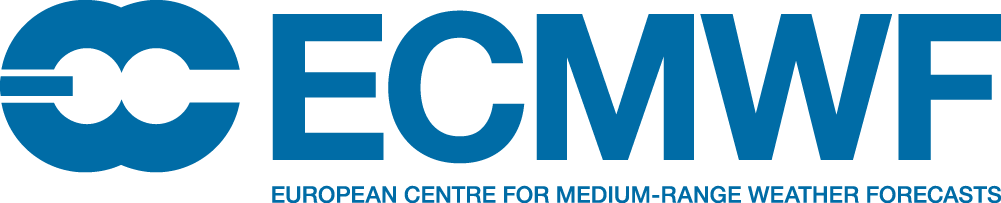
</div>

# 	Vorticity at various pressure levels

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-vorticity


<div class="output_png output_subarea output_execute_result">
<center>
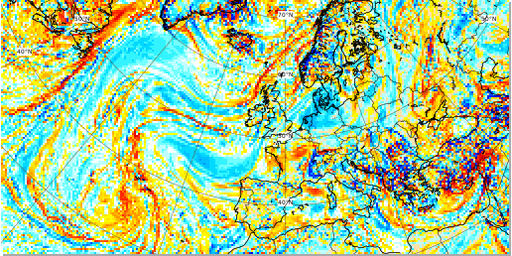</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/UDOC/ECMWF+Open+Data+-+Real+Time).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter :

* [Vorticity (relative)](https://apps.ecmwf.int/codes/grib/param-db/?id=138)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**ecmwf.data**](https://github.com/ecmwf/ecmwf-data) library to read and process the data 
- [**magpye**](https://magpye.readthedocs.io) to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-data ecmwf-opendata magpye

In [2]:
import ecmwf.data as ecdata
from magpye import GeoMap
from ecmwf.opendata import Client

In [3]:
client = Client("ecmwf", beta=True)

In [4]:
parameters = ['vo']
filename = 'medium-vorticity.grib'
filename

'medium-vorticity.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [5]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="pl",
    levelist=[1000,925,850,700,500,300,250,200,50],
    param=parameters,
    target=filename
)

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [6]:
data = ecdata.read(filename)

The **describe()** function will give us the overview of the dataset.  

In [7]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
vo,isobaricInhPa,"50,200,...",20220124,0,12,None,138,od,oper,fc,0001


And an overview of one parameter

In [8]:
data.describe('vo')

shortName,vo
name,Vorticity (relative)
paramId,138
units,s**-1
typeOfLevel,isobaricInhPa
level,"50,200,250,300,500,700,850,925,1000"
date,20220124
time,0
step,12
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [9]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,vo,isobaricInhPa,500,20220124,0,12,fc,None,regular_ll
1,ecmf,vo,isobaricInhPa,850,20220124,0,12,fc,None,regular_ll
2,ecmf,vo,isobaricInhPa,700,20220124,0,12,fc,None,regular_ll
3,ecmf,vo,isobaricInhPa,1000,20220124,0,12,fc,None,regular_ll
4,ecmf,vo,isobaricInhPa,200,20220124,0,12,fc,None,regular_ll
5,ecmf,vo,isobaricInhPa,300,20220124,0,12,fc,None,regular_ll
6,ecmf,vo,isobaricInhPa,925,20220124,0,12,fc,None,regular_ll
7,ecmf,vo,isobaricInhPa,250,20220124,0,12,fc,None,regular_ll
8,ecmf,vo,isobaricInhPa,50,20220124,0,12,fc,None,regular_ll


The grib file contains all the levels, and we will use the **select()** method to filter one of them.

In [10]:
vo700 = data.select(level = 700)
vo700.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
vo,isobaricInhPa,700,20220124,0,12,None,138,od,oper,fc,0001


In order to match the units in the Open charts plot, we need to multiply the data with 100000.


In [11]:
vo700 *= 100000

## Plotting the data
And finally, we can plot the data on the map. 

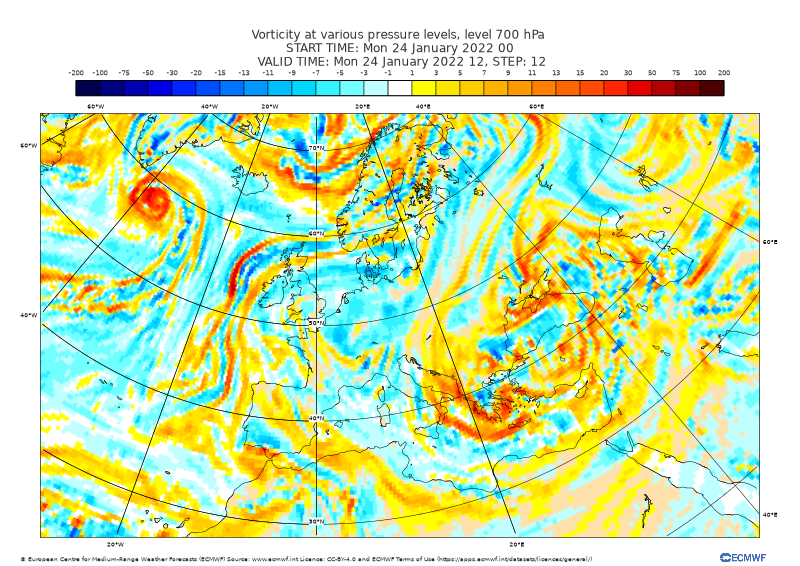

In [12]:
fig = GeoMap(area_name='europe')

fig.coastlines(land_colour="cream",resolution="medium")
fig.contour_shaded(vo700, style="blue_red_vorticity")

fig.coastlines(resolution="medium")
fig.gridlines()

fig.title(["Vorticity at various pressure levels, level <grib_info key='level' /> hPa ",
          "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H'/> ",
          " VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' />, STEP: <grib_info key='step'/>"])
fig.legend()

fig.footer("© European Centre for Medium-Range Weather Forecasts (ECMWF) Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use (https://apps.ecmwf.int/datasets/licences/general/)", logo='ecmwf')
fig.show()

Note that plot produced using open data dataset will slightly differ from one from Open Charts. This is due to different resolution of the data.  
Open data is on 0.4x0.4 resolution, while high resolution data is 0.1x0.1 grid.